## **TÊN ĐỀ TÀI: Dự đoán giá cổ phiếu của Công ty cổ phần Tập đoàn Hòa Phát (HOSE:HPG)**







## **Import the libraries**

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00


In [ ]:
!pip install statsmodels

In [ ]:
#import thư viện
import math
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima.arima.utils import ndiffs
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

## **Import data from vnstock**

In [ ]:
! pip install -U vnstock

In [ ]:
#import dữ liệu từ vnstock
from vnstock import *

In [ ]:
listing_companies()

,ticker,comGroupCode,organName,organShortName,organTypeCode,comTypeCode,icbName,icbNamePath,sector,industry,...,VNCOND,VNCONS,VNENE,VNFIN,VNHEAL,VNIND,VNIT,VNMAT,VNREAL,VNUTI
0,SSI,HOSE,Công ty Cổ phần Chứng khoán SSI,Chứng khoán SSI,DN,CK,Môi giới chứng khoán,Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...,Tài chính,Dịch vụ tài chính,...,False,False,False,True,False,False,False,False,False,False
1,BCM,HOSE,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...,Becamex IDC,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
2,VHM,HOSE,Công ty Cổ phần Vinhomes,Vinhomes,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
3,VIC,HOSE,Tập đoàn Vingroup - Công ty CP,VinGroup,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
4,VRE,HOSE,Công ty Cổ phần Vincom Retail,Vincom Retail,DN,CT,Bất động sản,Tài chính/Bất động sản/Bất động sản/Bất động sản,Tài chính,Bất động sản,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,SDK,UPCOM,Công ty Cổ phần Cơ khí Luyện Kim,Cơ khí Luyện Kim,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False
1603,SRF,HOSE,Công ty Cổ phần Searefico,SEAREFICO,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False
1604,UEM,UPCOM,Công ty Cổ phần Cơ điện Uông Bí - Vinacomin,Cơ điện Uông Bí - Vinacomin,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False
1605,VEA,UPCOM,Tổng Công ty Máy động lực và Máy nông nghiệp V...,Máy động lực và Máy NN,DN,CT,Máy công nghiệp,Công nghiệp/Hàng & Dịch vụ Công nghiệp/Công ng...,Công nghiệp,Hàng & Dịch vụ Công nghiệp,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#import dữ liệu HPG kết thúc ngày 13-04-2024
df = stock_historical_data(symbol="HPG",start_date="2023-01-01", end_date="2024-04-13", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
df

,time,open,high,low,close,volume,ticker
0,2023-01-03,18300,19250,18200,19250,27990600,HPG
1,2023-01-04,19450,19800,19300,19400,20230000,HPG
2,2023-01-05,19400,20000,19150,19800,21502200,HPG
3,2023-01-06,19700,20100,19200,19400,19630100,HPG
4,2023-01-09,19800,20100,19500,19600,16185000,HPG
...,...,...,...,...,...,...,...
313,2024-04-08,29450,29800,29300,29600,16708800,HPG
314,2024-04-09,29600,29900,29550,29900,9838000,HPG
315,2024-04-10,29950,30100,29650,29650,11134400,HPG
316,2024-04-11,29450,30150,29450,29900,19246200,HPG


## **Làm sạch dữ liệu**

In [ ]:
# Thay đổi cột index của DataFrame bằng cột 'time'
df = df.set_index('time')
df.head()

,open,high,low,close,volume,ticker
time,,,,,,
2023-01-03,18300,19250,18200,19250,27990600,HPG
2023-01-04,19450,19800,19300,19400,20230000,HPG
2023-01-05,19400,20000,19150,19800,21502200,HPG
2023-01-06,19700,20100,19200,19400,19630100,HPG
2023-01-09,19800,20100,19500,19600,16185000,HPG


Đây là bảng chứa dữ liệu các cột Giá mở cửa, Giá cao nhất, thấp nhất trong ngày, Giá đóng cửa và Khối lượng giao dịch trong ngày của cổ phiếu HPG

In [ ]:
# Drop những feature không cần thiết
df1 = df.drop(['open', 'high', 'low', 'volume', 'ticker'], axis = 'columns')
# Lấy 5 dòng đầu của data set
df1.head()

,close
time,
2023-01-03,19250
2023-01-04,19400
2023-01-05,19800
2023-01-06,19400
2023-01-09,19600


In [ ]:
# Kiểm tra các giá rị NA
df1.isnull().sum()

close    0
dtype: int64

In [ ]:
#Kích thước dữ liệu
df1.shape

(318, 1)

## **Thống kê dữ liệu**

In [ ]:
#Kích thước dữ liệu
df1.shape

(318, 1)

In [ ]:
print(df.describe())

               open          high           low         close        volume
count    318.000000    318.000000    318.000000    318.000000  3.180000e+02
mean   25271.855346  25585.377358  24961.949686  25267.295597  2.370188e+07
std     3387.812451   3394.674575   3382.220441   3385.485755  1.086129e+07
min    18300.000000  19250.000000  18200.000000  19250.000000  6.219900e+06
25%    21550.000000  21862.500000  21262.500000  21562.500000  1.623865e+07
50%    26375.000000  26775.000000  25975.000000  26350.000000  2.106405e+07
75%    27900.000000  28100.000000  27600.000000  27800.000000  2.862585e+07
max    31200.000000  31400.000000  30700.000000  31150.000000  8.684150e+07


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 2023-01-03 to 2024-04-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   close   318 non-null    int64
dtypes: int64(1)
memory usage: 5.0+ KB


Thông tin cơ bản của DataFrame bao gồm:

1.   DataFrame có 318 mục được lấy từ ngày 2023-01-03 đến ngày 2024-04-12
2.   Cột dữ liệu là cột 'close' với các giá trị là non-null và kiểu dữ liệu là int64
3. DataFrame sử dụng hơn 5.0 KB bộ nhớ (memory usage)



In [ ]:
print(df1.describe())

              close
count    318.000000
mean   25267.295597
std     3385.485755
min    19250.000000
25%    21562.500000
50%    26350.000000
75%    27800.000000
max    31150.000000


Kết quả thống kê bao gồm: số lượng dữ liệu (count), giá trị trung bình (mean), độ lệch chuẩn (std), giá trị nhỏ nhất (min), phân vị 25% (25%), trung vị (50%), phân vị 75% (75%), giá trị lớn nhất (max). Cụ thể:
*   count: có 318 mục giá trị đầu vào trong bảng
*   mean: giá trị trung bình là khoảng 25267.296
*   std: độ lệch chuẩn là khoảng 3385.486, cho thấy mữ độ phân tán của dữ liệu so với giá trị trung bình
*   min: giá trị nhỏ nhất là 19250
*   25%: phân vị 25% là khoảng 21562.5, tức là 25% dữ liệu có giá đóng cửa dưới 21562.5
*   50%: trung vị là 26350, tức là 50% dữ liệu có giá đóng cửa dưới 26350
*   75%: phân vị 75% là 27800, tức là 75% dữ liệu có giá đóng cửa dưới 27800
*   max: giá trị lớn nhất là khoảng 31158



## **Kiểm tra độ phù hợp của dữ liệu với mô hình**

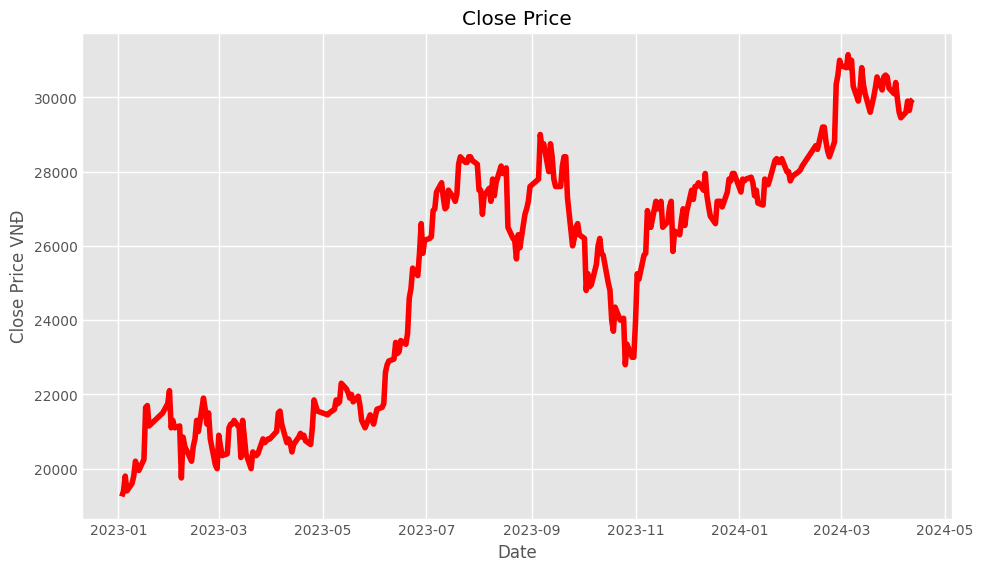

In [ ]:
# Plot the closing price
plt.figure(figsize=(10,6), facecolor='white')
plt.title('Close Price')
plt.plot(df1['close'], color='red')
plt.xlabel('Date')
plt.ylabel('Close Price VNĐ')
plt.show()

**Ngoài ra, có thể trực quan hóa dữ liệu thông qua Probability Distribution (Phân phối xác xuất)**

<Axes: ylabel='Density'>

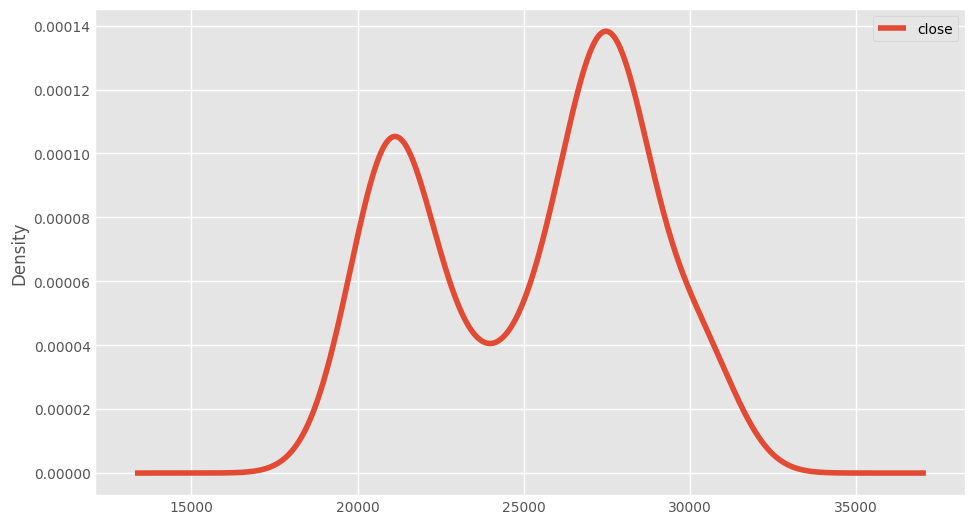

In [ ]:
#Distribution of the dataset
df1.plot(kind='kde')

Một time series nhất định có thể bao gồm các thành phần mang tính hệ thống bao gồm: level, trend, seasonality, noise
*   Các Thành phần này được định nghĩa như sau

1.   Level: Giá trị trung bình trong series (The average value in the series)
2.   Trend: Giá tị tăng hoặc giảm trong series (The increasing or decreasing value in the series)
3.   Seasonality: Chu kỳ ngắn hạn lặp đi lặp lại trong series (The repeating short-term cycle in the series)
4.   Noise: Độ nhiễu (The random variation in the series)

*   Đầu tiên, cần kiểm tra xem time series này có tính dừng hay không vì phân tích chuỗi thời gian chỉ hoạt động với dữ liệu mang tính dừng (stationary data).
*   **ADF (Augmented Dickey-Fuller) Test**: Kiểm định Dicky-Fuller là một trong những kiểm định time series nổi tiếng nhất.

> **H0:** Chuỗi có nghiệm đơn vị (value of a =1) (the series has a unit root)

> **H1:** Chuỗi không có nghiệm đơn vị (the series has no unit root)


*   - Nếu ta không bác bỏ được H0 thì time series không mang tính dừng (non-stationary). Điều này có nghĩa là time series này Linear hoặc Difference stationary
*   - Nếu cả giá trị trung bình (mean) và độ lệch chuẩn (standard deviation) đều là các đường thẳng (trung bình không đổi và phương sai không đổi) thì time series sẽ mang tính dừng
- **Vậy đầu tiên ta sẽ kiểm tra stationarity**












### Checking Stationarity

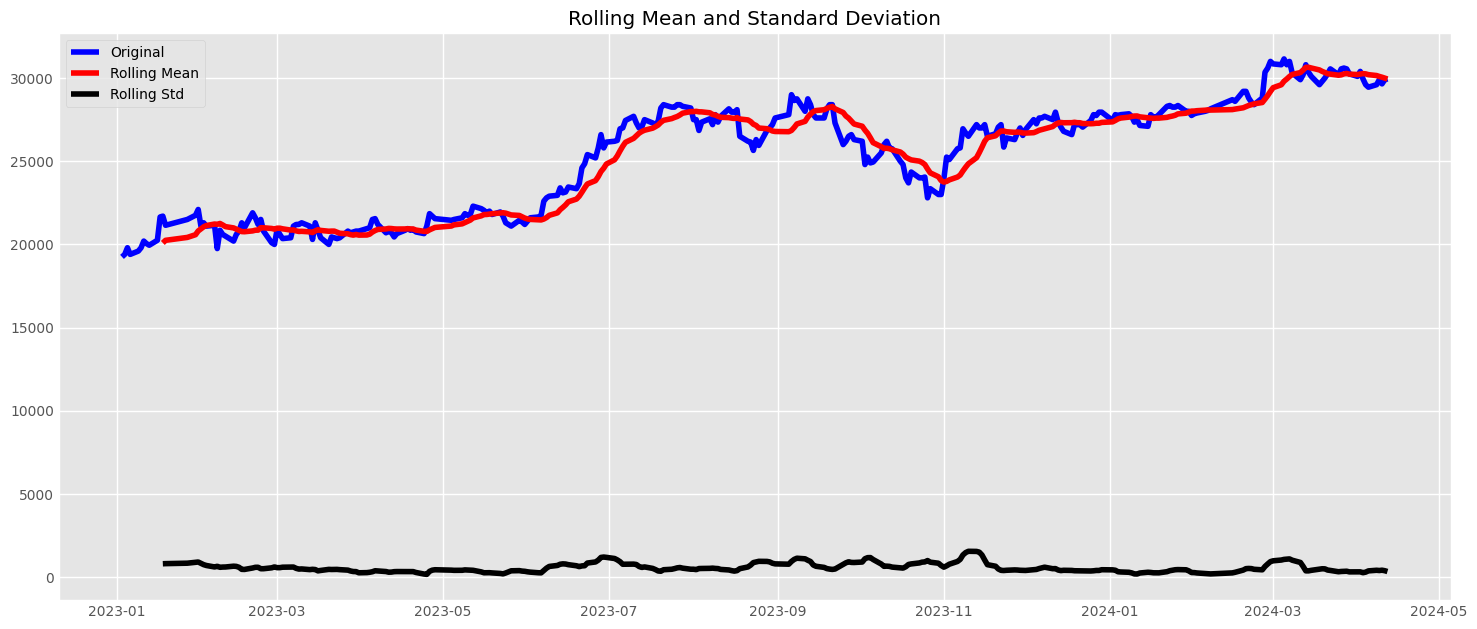

Kết quả của Kiểm định Dicky-Fuller
Test Statistics                 -1.440957
p-value                          0.562491
No. of lags used                 0.000000
Number of observations used    317.000000
critical value (1%)             -3.451148
critical value (5%)             -2.870701
critical value (10%)            -2.571651
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    #Sử dụng phương thức Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # tính giá trị trung bình di động (rolling mean), mỗi giá trị trung bình được tính từ 12 ngày liên tiếp.
    rolstd = timeseries.rolling(12).std() # tính độ lệch chuẩn di động (rolling standard deviation)

    plt.figure(figsize=(16,7))
    fig = plt.figure(1)

    #Trực quan rolling statistics
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Kết quả của Kiểm định Dicky-Fuller")
    adft = adfuller(timeseries,autolag='AIC')
    #tạo một đối tượng ouput từ bốn giá trị đầu tiên của kết quả kiểm định (adft[0:4]), với các chỉ mục tương ứng là ‘Test Statistics’, ‘p-value’, ‘No. of lags used’, và ‘Number of observations used’.
    #Vòng lặp for sẽ thêm các giá trị tới đối tượng output với chỉ mục là các giá trị tới hạn (critical values) từ kết quả kiểm định.
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df1)

- Thông qua biểu đồ trên, chúng ta có thể thấy giá trị trung bình (mean) và độ lệch chuẩn (standard deviation) có chiều hướng đi lên và do đó series không mang tính dừng
* - **p-value ≥ 0.05** nên ta không thể bác bỏ **H0**. Và Test Statistics cũng lớn hơn critical values nên dữ liệu không dừng (non-stationary)
* - Vậy để thực hiện phân tích chuỗi thời gian (time series), ta cần phải tách Seasonality và Trend ra khỏi chuỗi thời gian. Và chuỗi kết quả sẽ mang tính dừng thông qua quá trình này
*   ⇒ Tách Seasonality và Trend ra khỏi time series





### Seperate Seasonality and Trend

<Figure size 1000x600 with 0 Axes>

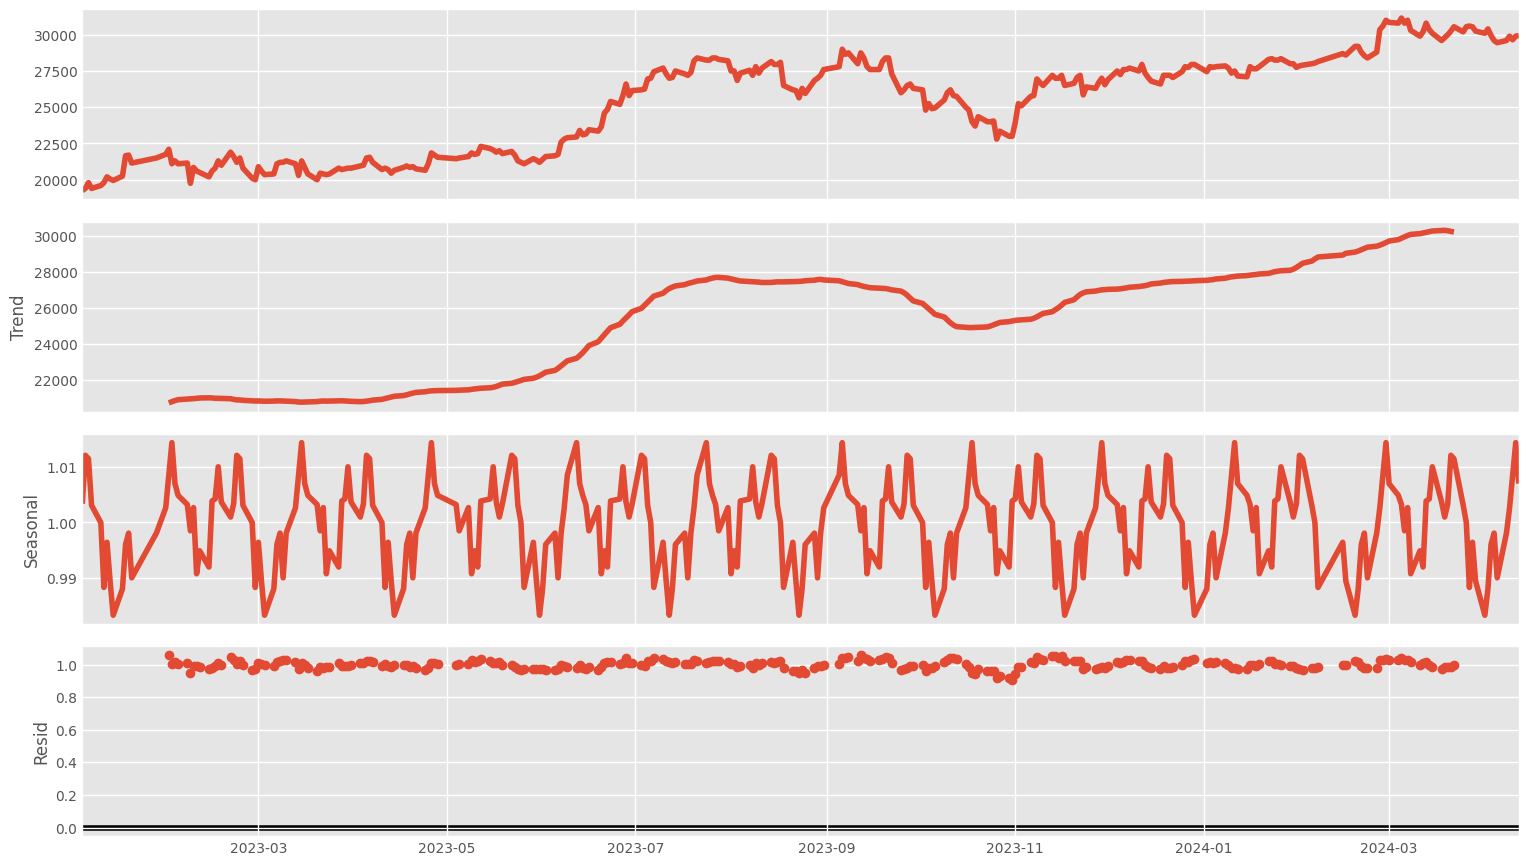

In [ ]:
#Tách Seasonality và Trend ra khỏi time series
result = seasonal_decompose(df1, model='multiplicative', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

Bắt đầu bằng việc lấy log của chuỗi để giảm độ lớn của các giá trị (the magnitude of the values) và giảm xu hướng tăng của chuỗi. Sau khi lấy được log của chuỗi, ta tính được trung bình động (the rolling average) của chuỗi.

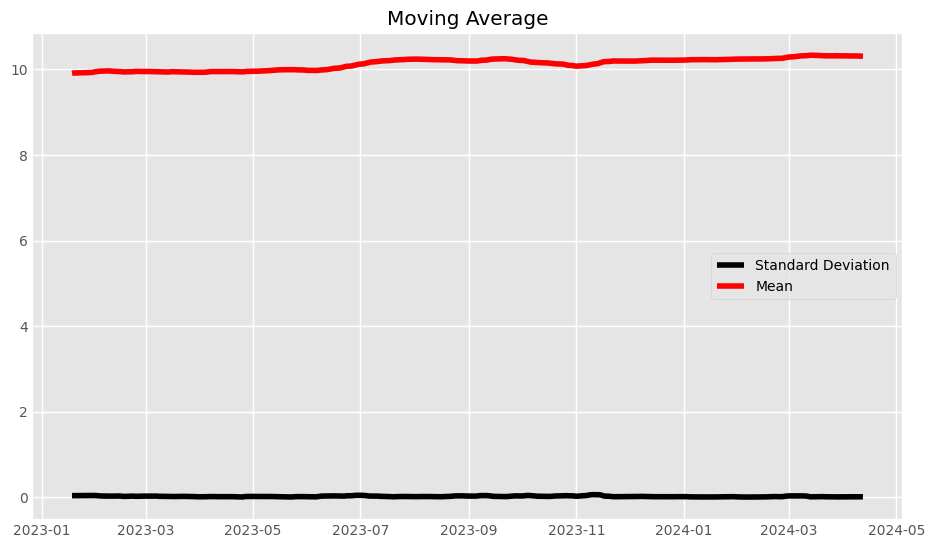

In [ ]:
# Nếu không mang tính dừng thì loại bỏ thành phần Trend
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df1)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Sẵn sàng xây dựng mô hình ARIMA và huấn luyện nó với closing price của cổ phiếu trên training data ⇒ chia dữ liệu thành tập huấn luyện và tập kiểm tra rồi trực quan hóa nó.

## **Chia dữ liệu thành tập train và tập test**

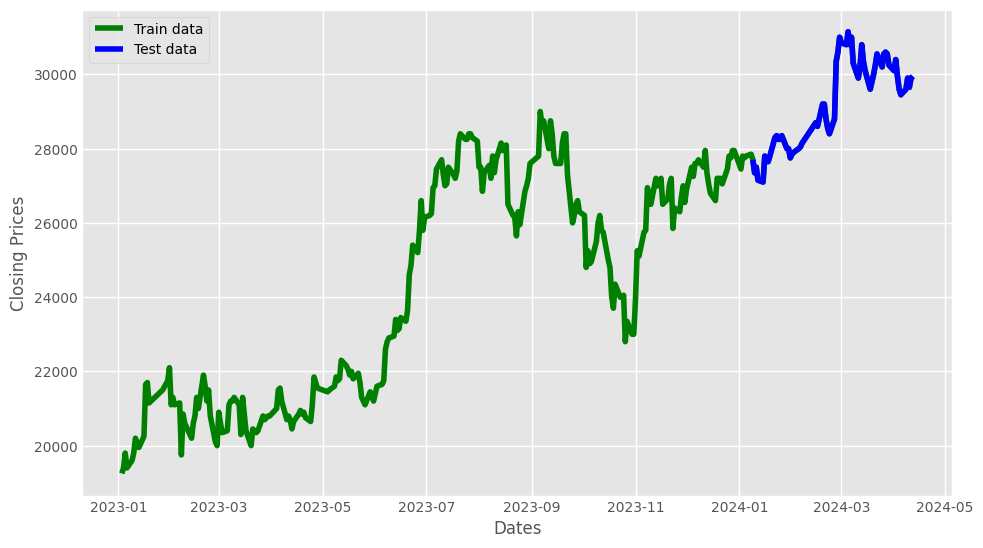

In [ ]:
# Chia dữ liệu 80% tập train và 20% tập test
def split_data(df, split_ratio=0.8, Ntest=64):
# Mặc định là 0.8 cho 80% training data, ntest 64
  if Ntest > 0:
    train_size = len(df) - Ntest
  else:
    train_size = int(len(df) * split_ratio)

  train_data = df.iloc[:train_size]
  test_data = df.iloc[train_size:]

  return train_data, test_data
# 0.8 cho 80% training data, 20% testing data
train_data, test_data = split_data(df1, split_ratio=0.8,)
# Trực quan hóa tập dữ liệu vừa chia
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df1, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

# **MODEL AUTO-ARIMA**


In [ ]:
d_val = ndiffs(df1['close'], test='adf')
print('Arima D-value:', d_val)

Arima D-value: 1


Hàm ndiffs giúp xác định các bước lấy sai phân thích hợp để đạt được tính dừng. Nếu ndiffs trả về giá trị 0 thì chuỗi có thể đã đứng yên (không cần lấy sai phân).

In [ ]:
# Xác định auto-arima để tìm mô hình tốt nhất
model = pm.auto_arima(train_data['close'],
                      d = d_val,
                      start_p = 0,
                      max_p = 5,
                      start_q = 0,
                      max_q = 5,
                      stepwise=False,
                      max_order=30,
                      trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=3828.986, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=3829.192, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=3830.966, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=3832.901, Time=0.11 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=3834.272, Time=0.13 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=3836.438, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=3829.072, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=3830.661, Time=0.95 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=3832.967, Time=0.45 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=3834.486, Time=1.71 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=3836.236, Time=0.36 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=3838.196, Time=0.64 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=3830.868, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=3832.736, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=3834.582, Time=0.55 sec
 ARIMA(2,1

In [ ]:
# Tra các giá trị của các tham số
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 1),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

**Giải thích:**

**maxiter**: 50 cho biết số lần lặp tối đa cho quá trình tối ưu hóa là 50

**method**: sử dụng phương pháp tối ưu hóa lbfgs (Limited-memory Broyden-Fletcher-Golfarb-Shanno)

**order**: thứ tự của mô hình ARIMA là (0, 1, 0), nghĩa là không có thành phần tự hồi quy (AR), có một lần sai phân (I), và không có thành phần trung bình trượt (MA)

**out_of_sample_size**: số lượng dữ liệu ngoài mẫu được sử dụng khi tính toán điểm số, ở đây là 0

**scoring**: tiêu chí đánh giá mô hình là 'mse' tức là sai số bình phương trung bình

**scoring_args**: không có đối số bổ sung cho tiêu chí đánh giá

**seasonal_order**: thứ tự mùa vụ của mô hình ARIMA là (0, 0, 0, 1)

**start_params**: không có tham số bắt đầu cho quá trình tối ưu hóa

**suppress_warnings**: True, ẩn cảnh báo

**trend**: không đặt xu hướng của mô hình

**with_intercept**: có sử dụng giao thoa



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  254
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1912.493
Date:                Mon, 22 Apr 2024   AIC                           3828.986
Time:                        17:00:26   BIC                           3836.053
Sample:                             0   HQIC                          3831.830
                                - 254                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.9921     29.575      1.149      0.250     -23.974      91.958
sigma2      2.155e+05   1.48e+04     14.519      0.000    1.86e+05    2.45e+05
Ljung-Box (L1) (Q):                   2.71   Jarque-

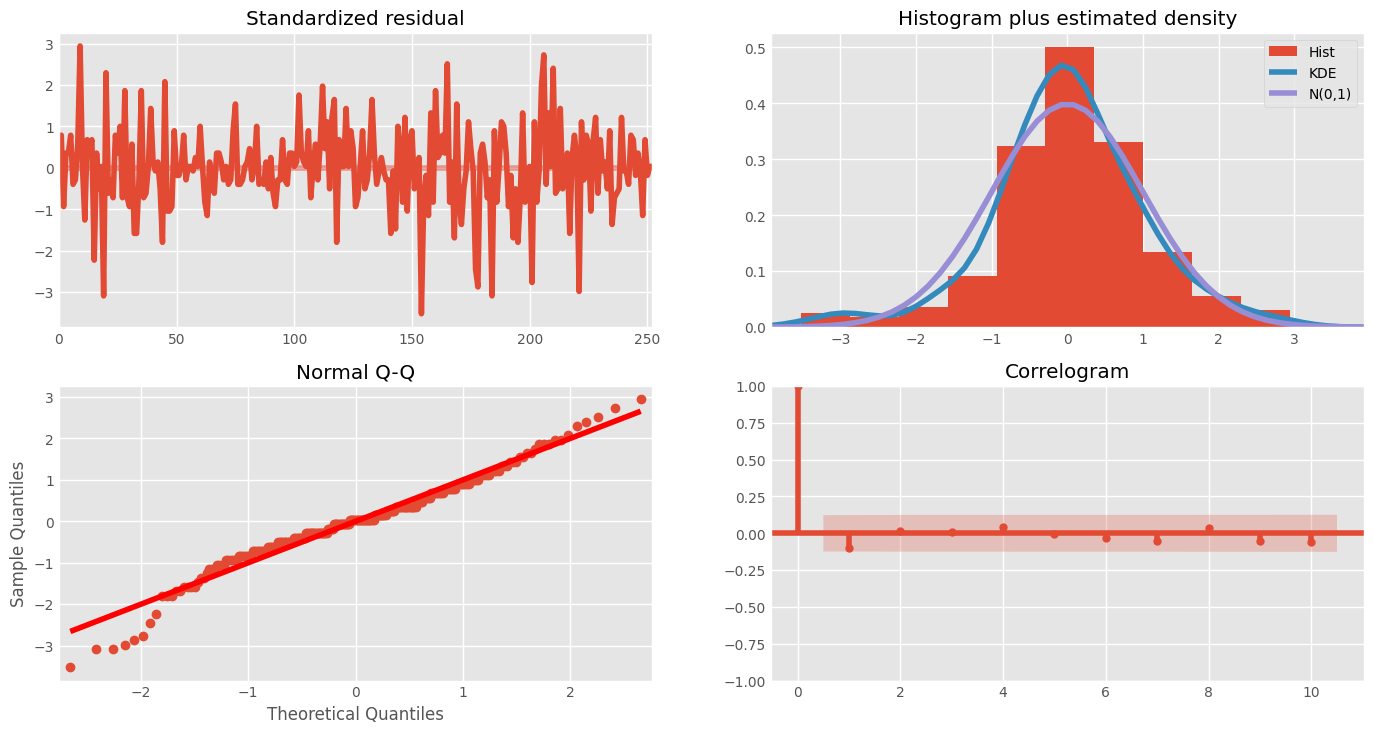

In [ ]:
print(model.summary())
model.plot_diagnostics(figsize=(15,8))
plt.show()

**Chú Thích**

**1. Biểu đồ phần dư - Trên cùng bên trái:**

* Quan sát: Các điểm dữ liệu dao động quanh đường 0, cho thấy trung bình của phần dư xấp xỉ 0.
* Đánh giá: Điều này khẳng định tính công bằng của mô hình, nghĩa là không có sai lệch hệ thống trong dự đoán.
* Lưu ý: Mức độ dao động của các điểm dữ liệu thể hiện phương sai của phần dư.

**2. Biểu đồ mật độ - Trên cùng bên phải:**

* Quan sát: Biểu đồ phân bố gần với hình chuông, gợi ý phân phối chuẩn của phần dư.
* Đánh giá: Phân phối chuẩn của phần dư hỗ trợ giả định về tính bình thường trong mô hình hồi quy.
* Lưu ý: Mức độ lệch khỏi hình chuông cho thấy mức độ lệch chuẩn của phần dư.

**3. Biểu đồ Q-Q - Dưới cùng bên trái:**

* Quan sát: Các điểm dữ liệu nằm gần đường chéo màu đỏ, khẳng định sự tương thích giữa phân phối phần dư và phân phối chuẩn.
* Đánh giá: Biểu đồ Q-Q tăng cường sự tin tưởng vào giả định về tính bình thường của phần dư.
* Lưu ý: Bất kỳ điểm dữ liệu nào lệch xa đường chéo thể hiện sự sai lệch so với phân phối chuẩn.

**4. Biểu đồ ACF - Dưới cùng bên phải:**

* Quan sát: Hầu hết các điểm dữ liệu nằm trong vùng không đáng kể (màu đỏ nhạt), chỉ ra không có tự tương quan trong phần dư.
* Đánh giá: Điều này xác nhận tính độc lập của các phần dư, nghĩa là mỗi giá trị không bị ảnh hưởng bởi các giá trị trước đó.
* Lưu ý: Bất kỳ điểm dữ liệu nào nằm ngoài vùng không đáng kể cho thấy sự tự tương quan, cần xem xét thêm các biến dự đoán.


In [ ]:
def plot_result(model, data, col_name, Ntest):

    params = model.get_params()
    d = params['order'][1]

    # Trong dự đoán dữ liệu mẫu
    train_pred = model.predict_in_sample(start=d, end=-1)
    # Đầu ra dữ đoán mẫu
    test_pred, conf = model.predict(n_periods=Ntest, return_conf_int=True)

    # Vẽ đồ thị giá trị thực, giá trị phù hợp và giá trị dự đoán
    plt.figure(figsize=(10,5), dpi=100)
    plt.plot(train_data, label='Training Data')
    plt.plot(data[col_name].index, data[col_name], label='Actual Stock Price')
    plt.plot(train_data.index[d:], train_pred, color='green', label='Fitted Values')
    plt.plot(test_data.index, test_pred, label='Predicted Stock Price')
    plt.fill_between(test_data.index, conf[:,0], conf[:,1], color='red', alpha=0.3)
    plt.title('Giá dự đoán của cổ phiếu Tập đoàn Hòa Phát')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá của cổ phiếu Tập đoàn Hòa Phát')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

    # Đánh giá mô hình bằng số liệu MSE,MAE,MAPE
    y_true = test_data[col_name].values
    mae = mean_absolute_error(y_true,test_pred)
    mape =np.mean(np.abs(test_pred - y_true)/np.abs(y_true))
    mse = mean_squared_error(y_true,test_pred)
    return mape, mae,mse


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


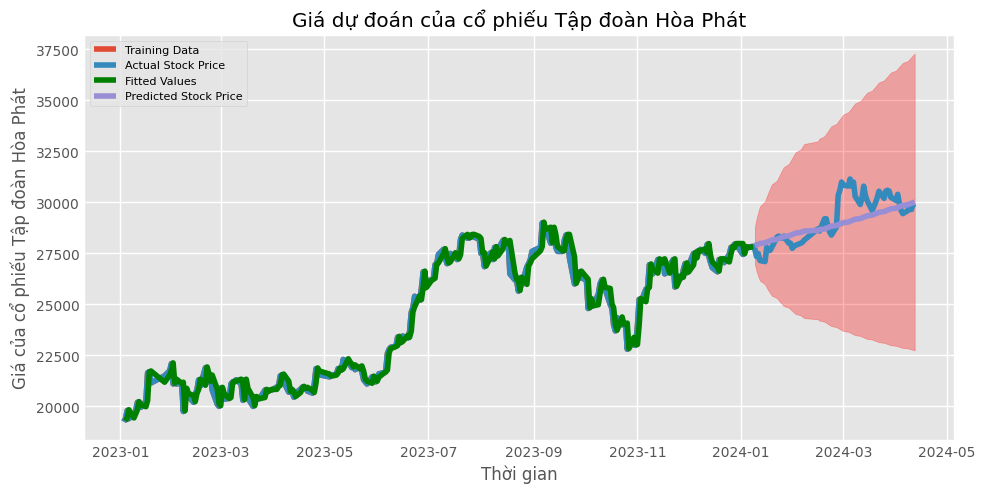

Mean Absolute Percent Error:  0.021447566083454862
Mean Absolute Error:  638.9451581027674
Mean Squared Error: 703432.589801827


In [ ]:
# Báo cáo hiệu suất mô hình auto-arima đã tạo
mape, mae, mse= plot_result(model, df1, 'close', Ntest=64)
print('Mean Absolute Percent Error: ', mape)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error:',mse)

Khoảng 2,1% MAPE ngụ ý rằng mô hình có độ chính xác khoảng 97,9% trong việc dự đoán  ngày quan sát tiếp theo.

**Dự đoán giá cổ phiếu tương lai**

In [ ]:
#Dự đoán giá cổ phiếu cho 6 tháng tiếp theo
index_future_dates=pd.date_range(start='2024-04-14',end='2024-10-10') #tạo index cho 6 tháng tiếp theo
forecast1 = model.predict(n_periods = 180)
forecast1.index=index_future_dates
print(forecast1)

2024-04-14    27883.992095
2024-04-15    27917.984190
2024-04-16    27951.976285
2024-04-17    27985.968379
2024-04-18    28019.960474
                  ...     
2024-10-06    33832.608696
2024-10-07    33866.600791
2024-10-08    33900.592885
2024-10-09    33934.584980
2024-10-10    33968.577075
Freq: D, Length: 180, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


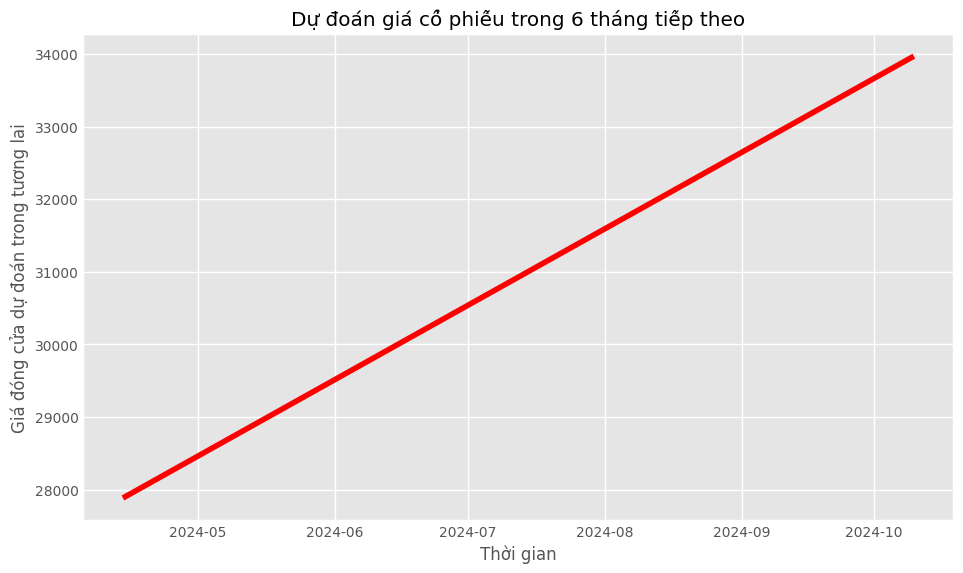

In [ ]:
# Plot the future forecast
plt.figure(figsize=(10,6), facecolor='white')
plt.title('Dự đoán giá cổ phiếu trong 6 tháng tiếp theo')
plt.plot(forecast1, color='red')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa dự đoán trong tương lai')
plt.show()